## Structure 
most people starts with How before why so the result is narrow questions and shallow arguments , The secret is to have structure that you can think through, rather than working in a vacuum.

   - **Context**: we are tring to understand how a city government works is by looking at who it employs and how its employees are compensated.

   - **Needs**: we have some question we hope to find the answer using this data like
   
       - How have salaries changed over time between different groups of people?
       - How are base pay, overtime pay, and benefits allocated between different groups?
       - Is there any evidence of pay discrimination based on gender in this dataset?
       - How is budget allocated based on different groups and responsibilities?
       
   - **Vision** : we would clean the data then analysis using some statistical methods.
       
   - **Outcome** : asnwering these question will give us more understanding about the city and fix the problem related with employees.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import fuzz , process
sns.set_style("whitegrid")

## Importing Data

In [5]:
df = pd.read_csv('Salaries.csv' , low_memory=False , index_col = 'Id')
df

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


## Exploratory Data Analysis


from the above insight we see that we have a missing data let's check the type of data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148654 entries, 1 to 148654
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148654 non-null  object 
 1   JobTitle          148654 non-null  object 
 2   BasePay           148045 non-null  float64
 3   OvertimePay       148650 non-null  float64
 4   OtherPay          148650 non-null  float64
 5   Benefits          112491 non-null  float64
 6   TotalPay          148654 non-null  float64
 7   TotalPayBenefits  148654 non-null  float64
 8   Year              148654 non-null  int64  
 9   Notes             0 non-null       float64
 10  Agency            148654 non-null  object 
 11  Status            0 non-null       float64
dtypes: float64(8), int64(1), object(3)
memory usage: 14.7+ MB


what about the missing data ?

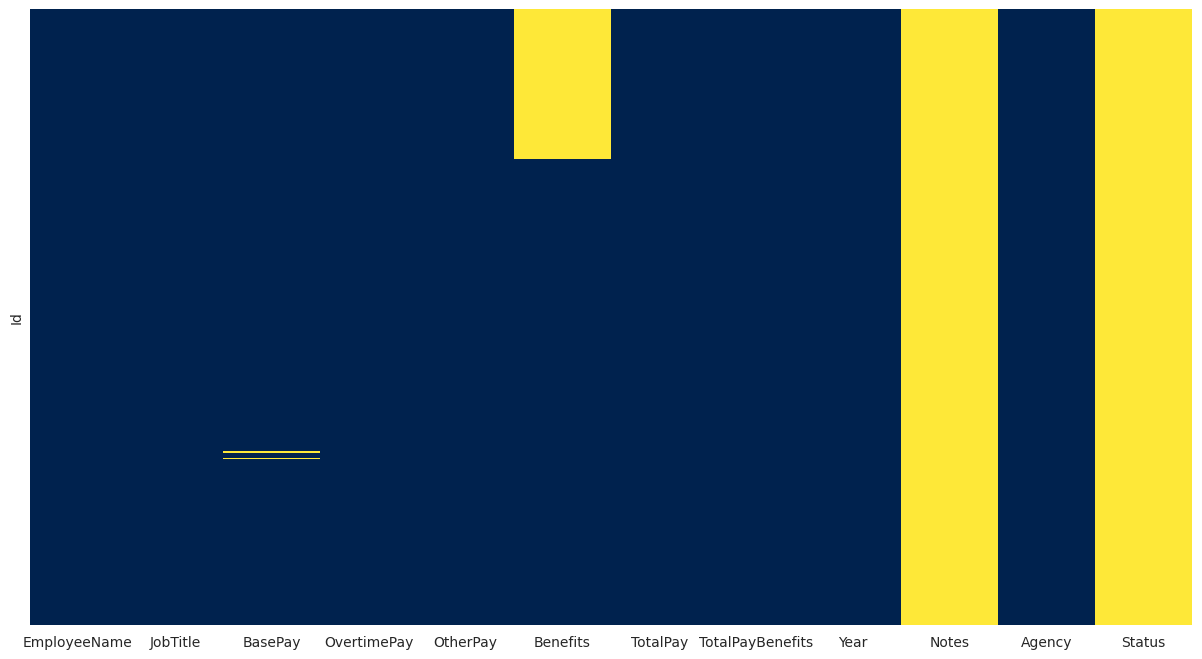

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull() , yticklabels=False , cbar=False , cmap = 'cividis' )
plt.show()

In [8]:
df.drop('Notes',axis = 1 , inplace=True)
df['BasePay'].fillna( 0 , inplace= True)
df['Benefits'].fillna( 0 , inplace= True)

#### Q1 | What Top 5 jobs get paid last 4 years ?
as we are dealing with employees so we are comparing based on the jobs , but how many jobs we are dealing with ?

In [9]:
print(f"The number of jobs are {len(list(df['JobTitle'].unique()))}")

The number of jobs are 2159


that is very large number of jobs in one city let's dig deep

In [10]:
df['JobTitle'].value_counts()

JobTitle
Transit Operator                                  7036
Special Nurse                                     4389
Registered Nurse                                  3736
Public Svc Aide-Public Works                      2518
Police Officer 3                                  2421
                                                  ... 
CHIEF HOUSING INSPECTOR                              1
TRAFFIC SIGNAL OPERATOR                              1
COURT COMPUTER FACILITIES COORDINATOR                1
AUTOMOTIVE BODY AND FENDER WORKER SUPERVISOR I       1
VICTIM & WITNESS TECHNICIAN                          1
Name: count, Length: 2159, dtype: int64

we have some jobs lower and other upper case let's lower all the jobs

In [11]:
df['JobTitle'] = df['JobTitle'].str.lower()

In [12]:
sum(df['JobTitle'].value_counts() > 10)

930

we have alot of jobs that repeated less than 10 times , to reduce them we set them to other to focus on the big picture

In [13]:
jobs_to_convert = df['JobTitle'].value_counts()[df['JobTitle'].value_counts() < 10].index

In [14]:
for job in jobs_to_convert:
    df['JobTitle'].replace(job , 'other' , inplace=True)

In [15]:
print(f"The number of jobs are {len(list(df['JobTitle'].unique()))}")

The number of jobs are 954


In [16]:
df['BasePay'].replace('Not Provided' , 0 , inplace= True)
df['OvertimePay'].replace('Not Provided' , 0 , inplace= True)
df['OtherPay'].replace('Not Provided' , 0 , inplace= True)
df['Benefits'].replace('Not Provided' , 0 , inplace= True)

In [17]:
convert_dict = {
    'BasePay' : float ,
    'OvertimePay' : float , 
    'OtherPay' : float ,
    'Benefits' : float   
}

df = df.astype(convert_dict)

In [18]:
df

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
Id,,,,,,,,,,,
1,NATHANIEL FORD,other,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco,NaN
2,GARY JIMENEZ,captain iii (police department),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco,NaN
3,ALBERT PARDINI,captain iii (police department),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco,NaN
4,CHRISTOPHER CHONG,other,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco,NaN
5,PATRICK GARDNER,other,134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...
148650,Roy I Tillery,custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco,NaN
148651,Not provided,other,0.00,NaN,NaN,0.0,0.00,0.00,2014,San Francisco,NaN
148652,Not provided,other,0.00,NaN,NaN,0.0,0.00,0.00,2014,San Francisco,NaN


from the discription of the data

- $TotalPay$ suppose to be equal to $OvertimePay + OtherPay + BasePay$ 

- $TotalPayBenefits$ suppose to be equal to $TotalPay + Benefits $

let's test that 

In [19]:
sum(df['BasePay'] + df['OtherPay']  + df['OvertimePay'] == df['TotalPay'] ) / len(df)

0.8217740524977465

In [20]:
sum(df['TotalPay'] + df['Benefits'] == df['TotalPayBenefits']) / len(df)

0.8429641987433907

quite good but let's update $TotalPayBenefits$ and $TotalPay$

In [21]:
df['TotalPay'] = df['BasePay'] + df['OtherPay']  + df['OvertimePay'] 
df['TotalPayBenefits'] = df['TotalPay'] + df['Benefits'] 

In [22]:
top_5_salaries = df[['JobTitle' , 'TotalPayBenefits']].groupby(by ='JobTitle').sum() \
    .sort_values(by ='TotalPayBenefits' , ascending=  False )[:5]
top_5_salaries

,TotalPayBenefits
JobTitle,
transit operator,7.952230e+08
registered nurse,6.965409e+08
firefighter,5.425706e+08
police officer 3,4.060903e+08
deputy sheriff,3.412028e+08


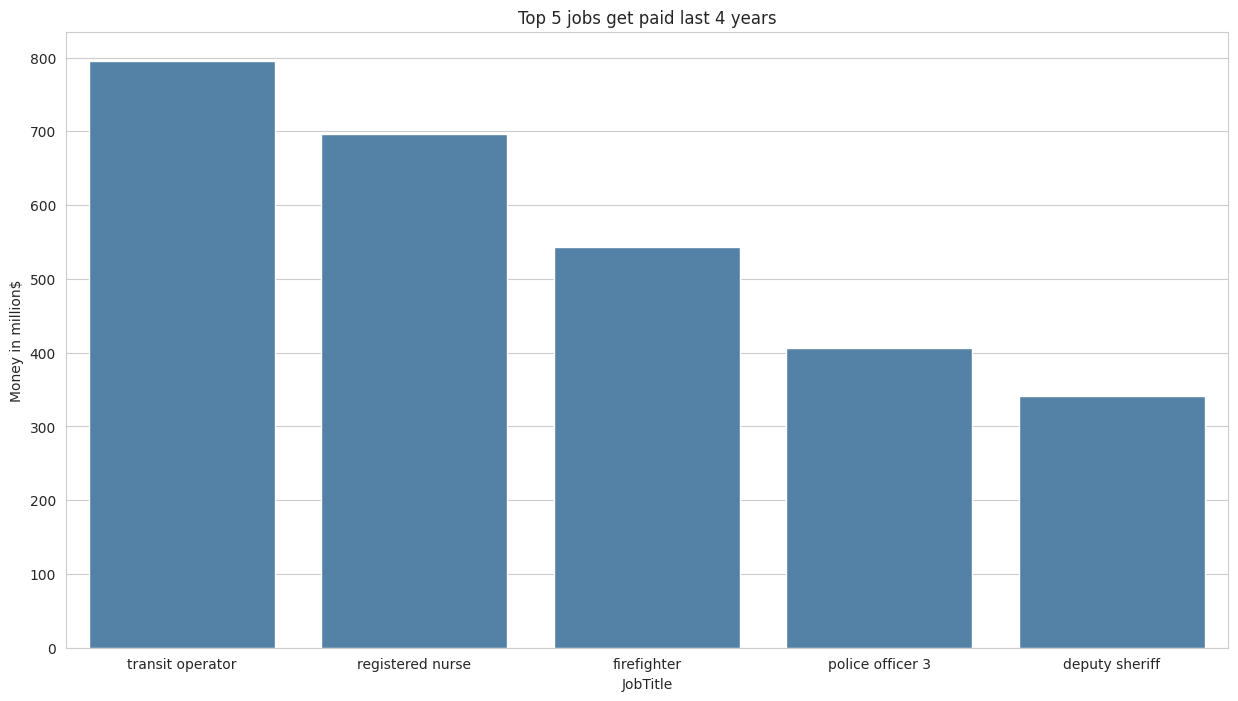

In [23]:
plt.figure(figsize=(15,8))
sns.barplot(x = top_5_salaries.index , y =top_5_salaries['TotalPayBenefits'] / 1_000_000, color='steelblue' )
plt.title('Top 5 jobs get paid last 4 years')
plt.ylabel('Money in million$')
plt.show()

#### Q2 | How much money spent over last 4 years ?


In [24]:
spend_every_year = df[['Year' , 'TotalPayBenefits']].groupby(by ='Year').sum() \
    .sort_values(by ='TotalPayBenefits' , ascending=  False )[:5]
spend_every_year

,TotalPayBenefits
Year,
2014,3.821866e+09
2013,3.814772e+09
2012,3.696940e+09
2011,2.594195e+09


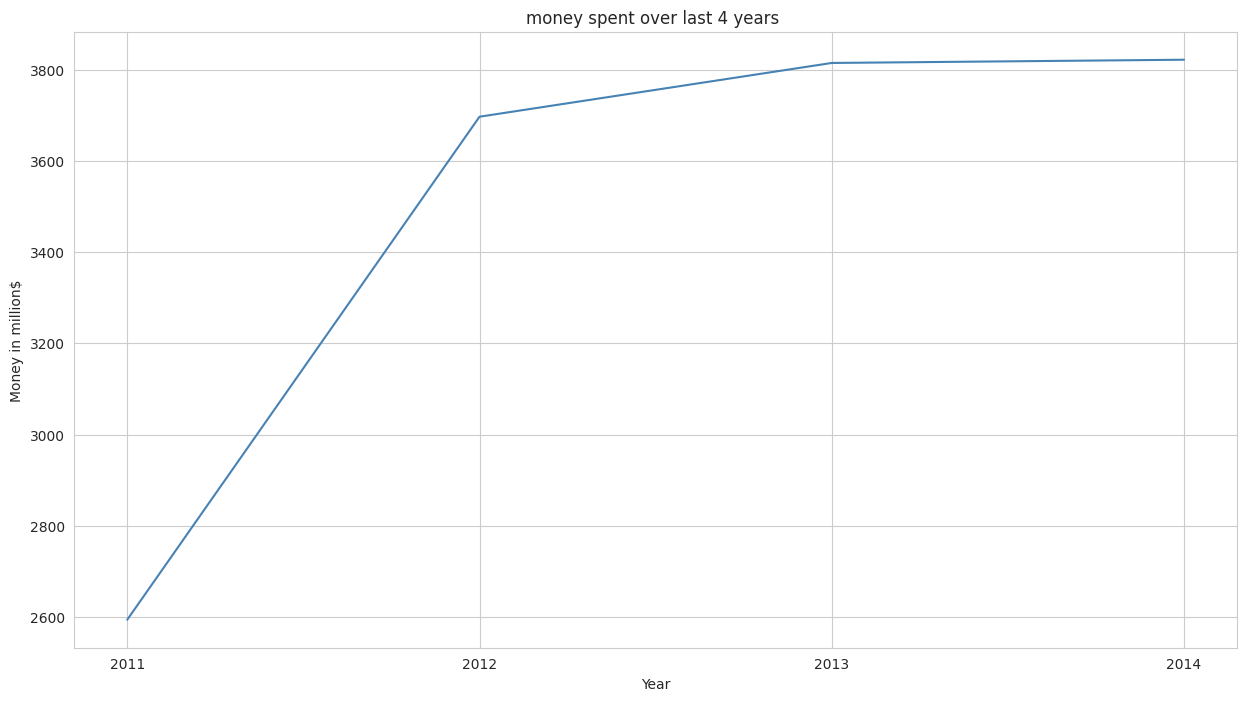

In [25]:
plt.figure(figsize=(15,8))
sns.lineplot(x = spend_every_year.index , y =spend_every_year['TotalPayBenefits'] / 1_000_000, color='steelblue' )
plt.title('money spent over last 4 years ')
plt.xticks([2011,2012,2013,2014])
plt.ylabel('Money in million$')
plt.show()

#### Q3 | If i were in San Francisco in 2014 how much would i get paid  ?


In [27]:
df_2014 = df[df['Year'] == 2014]
df_2014

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
Id,,,,,,,,,,,
110532,David Shinn,deputy chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,San Francisco,NaN
110533,Amy P Hart,asst med examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,San Francisco,NaN
110534,William J Coaker Jr.,other,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014,San Francisco,NaN
110535,Gregory P Suhr,other,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,2014,San Francisco,NaN
110536,Joanne M Hayes-White,other,302068.00,0.00,24165.44,91201.66,326233.44,417435.10,2014,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...
148650,Roy I Tillery,custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco,NaN
148651,Not provided,other,0.00,NaN,NaN,0.00,NaN,NaN,2014,San Francisco,NaN
148652,Not provided,other,0.00,NaN,NaN,0.00,NaN,NaN,2014,San Francisco,NaN


let's perform central limit therom taking 400 samples with n = 35 

In [28]:
samples = []
for i in range(500):
    samples.append(np.mean(df_2014['TotalPayBenefits'].sample(n = 40)))

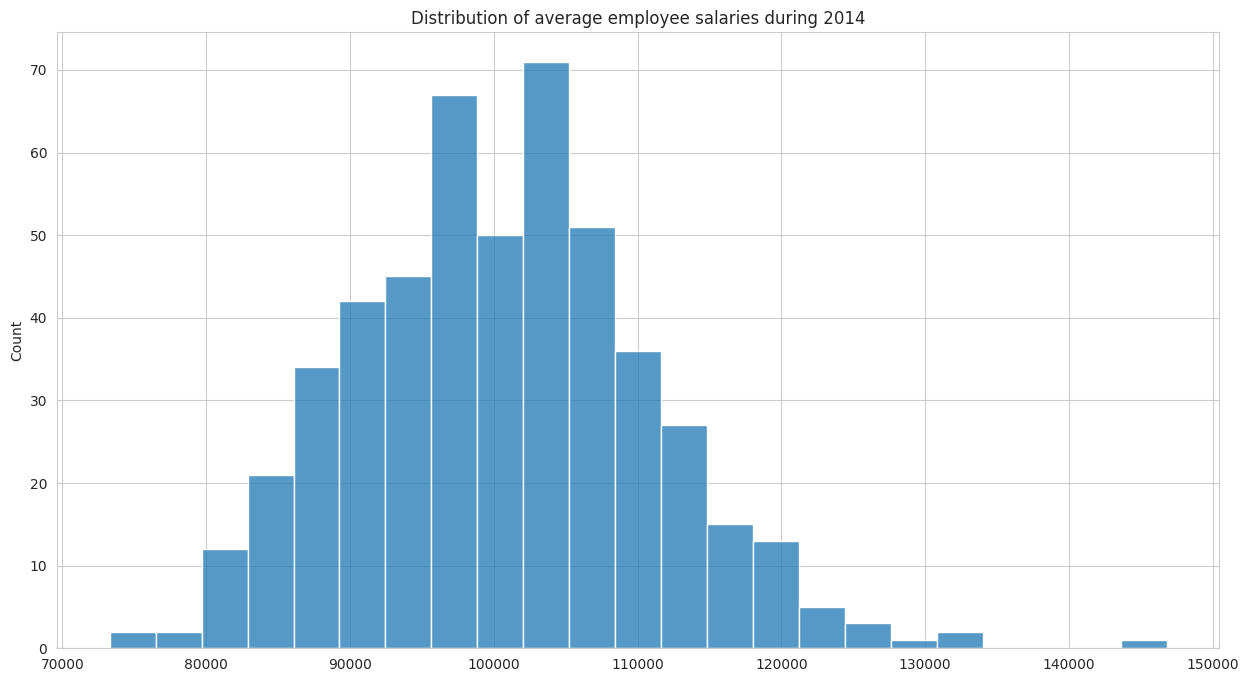

In [29]:
plt.figure(figsize=(15,8))
plt.title('Distribution of average employee salaries during 2014')
sns.histplot(samples)
plt.show()

In [30]:
np.mean(samples)

100508.64043671795

In [31]:
np.mean(df_2014['TotalPayBenefits'])

100261.4386683806

In [32]:
np.std(samples) 

10218.554470125731

In [33]:
np.std(df_2014['TotalPayBenefits']) / np.sqrt(40)

10472.43549752634

that is very samll proof of therom ,  according to the Central Limit Theorem, the sampling distribution of x-bar should be approximately normal, so that almost all of the values of x-bar fall into the interval (mu +- 3 * SE).

In [34]:
UCL  =  np.mean(samples) + 3 * (np.std(samples))
LCL  =  np.mean(samples) - 3 * (np.std(samples))

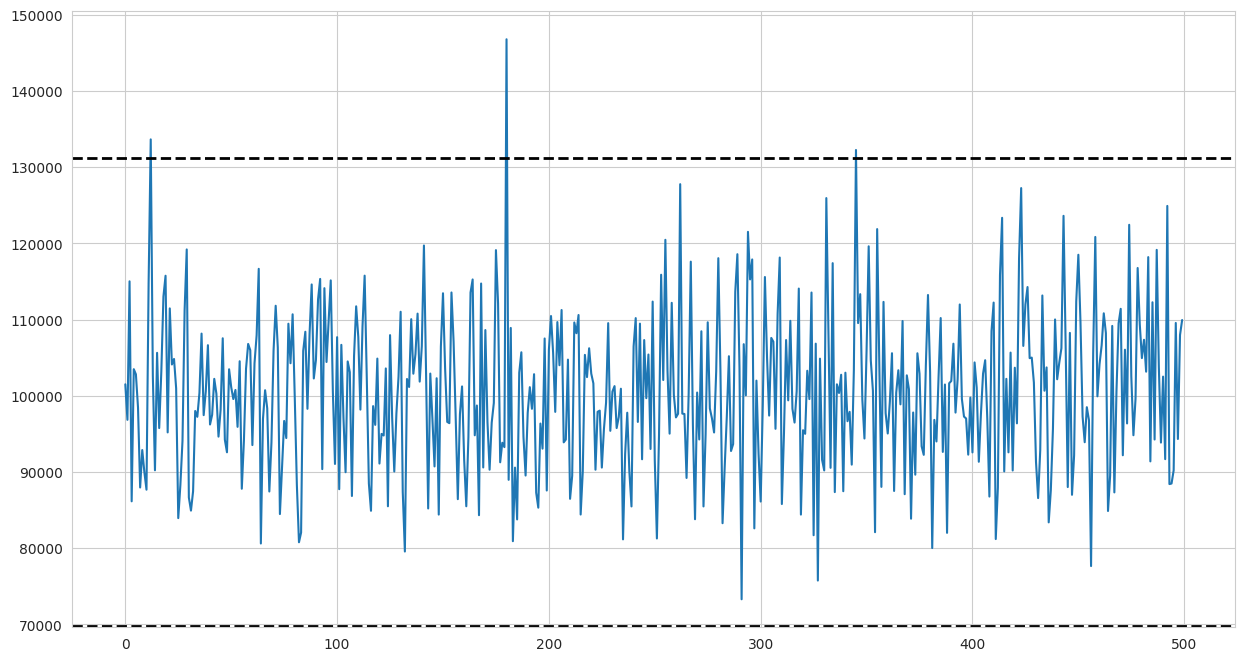

In [35]:
plt.figure(figsize=(15,8))
sns.lineplot(x = range(500) , y = samples)
plt.axhline(y = UCL , color = 'black' , lw = 2 ,linestyle  = '--' )
plt.axhline(y = LCL , color = 'black' , lw = 2 ,linestyle  = '--' )
